### Chronic Kidney Disease Prediction

In [171]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE, RandomOverSampler

In [172]:
# Load Dataset
df = pd.read_csv("kidney_disease.csv")
print("Dataset loaded successfully.")
df.head(10)

Dataset loaded successfully.


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [173]:
# Data Exploration
print("Dataset Info:")
df.info()
print("Dataset Shape:", df.shape)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 n

In [174]:
# Selecting relevant features
important_features = ['age', 'bp', 'sg', 'al', 'hemo', 'sc', 'htn', 'dm', 'cad', 'appet', 'pc', 'classification']
df = df[important_features]

In [175]:
# Checking missing values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
age                9
bp                12
sg                47
al                46
hemo              52
sc                17
htn                2
dm                 2
cad                2
appet              1
pc                65
classification     0
dtype: int64


In [176]:
# Statistical Summary
print(df.describe())

              age          bp          sg          al        hemo          sc
count  391.000000  388.000000  353.000000  354.000000  348.000000  383.000000
mean    51.483376   76.469072    1.017408    1.016949   12.526437    3.072454
std     17.169714   13.683637    0.005717    1.352679    2.912587    5.741126
min      2.000000   50.000000    1.005000    0.000000    3.100000    0.400000
25%     42.000000   70.000000    1.010000    0.000000   10.300000    0.900000
50%     55.000000   80.000000    1.020000    0.000000   12.650000    1.300000
75%     64.500000   80.000000    1.020000    2.000000   15.000000    2.800000
max     90.000000  180.000000    1.025000    5.000000   17.800000   76.000000


In [177]:
# Data Cleaning
# Fill missing values - numerical
for col in ['age', 'bp', 'hemo', 'sc']:
  df[col] = df[col].fillna(df[col].median())

In [178]:
# Fill missing values - categorical
for col in ['sg', 'al', 'htn', 'dm', 'cad', 'appet', 'pc']:
  df[col] = df[col].fillna(df[col].mode()[0])

In [179]:
print("Missing Values after Cleaning:")
print(df.isnull().sum())

Missing Values after Cleaning:
age               0
bp                0
sg                0
al                0
hemo              0
sc                0
htn               0
dm                0
cad               0
appet             0
pc                0
classification    0
dtype: int64


In [180]:
# Cleaning categorical values
df = df.map(lambda x: x.strip().replace('\t','') if isinstance(x, str) else x)

In [181]:
# Value Counts of Categorical Variables
for col in df.select_dtypes(include=['object']).columns:
  print(f"Value counts for {col}:")
  print(df[col].value_counts())
  print("\n")

Value counts for htn:
htn
no     253
yes    147
Name: count, dtype: int64


Value counts for dm:
dm
no     263
yes    137
Name: count, dtype: int64


Value counts for cad:
cad
no     366
yes     34
Name: count, dtype: int64


Value counts for appet:
appet
good    318
poor     82
Name: count, dtype: int64


Value counts for pc:
pc
normal      324
abnormal     76
Name: count, dtype: int64


Value counts for classification:
classification
ckd       250
notckd    150
Name: count, dtype: int64




In [182]:
#Encoding Categorical Variables
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['dm'] = df['dm'].map({'yes': 1, 'no': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [183]:
# Normalization
numerical_cols = ['age', 'bp', 'sg', 'al', 'hemo', 'sc']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Data after normalization:")
print(df.head())

Data after normalization:
        age        bp    sg   al      hemo        sc  htn  dm  cad  appet  pc  \
0  0.522727  0.230769  0.75  0.2  0.836735  0.010582    1   1    0      1   1   
1  0.056818  0.000000  0.75  0.8  0.557823  0.005291    0   0    0      1   1   
2  0.681818  0.230769  0.25  0.4  0.442177  0.018519    0   1    0      0   1   
3  0.522727  0.153846  0.00  0.8  0.551020  0.044974    1   0    0      0   0   
4  0.556818  0.230769  0.25  0.4  0.578231  0.013228    0   0    0      1   1   

   classification  
0               1  
1               1  
2               1  
3               1  
4               1  


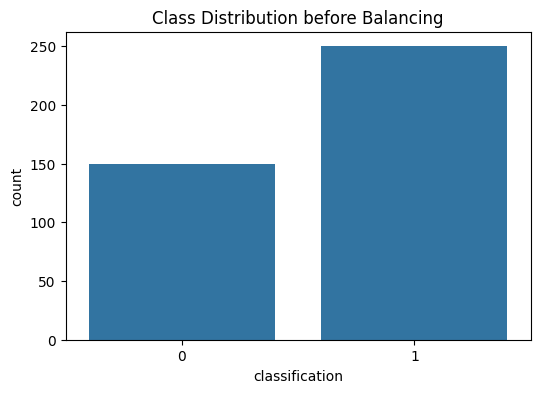

In [184]:
# Class Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x=df['classification'])
plt.title("Class Distribution before Balancing")
plt.show()

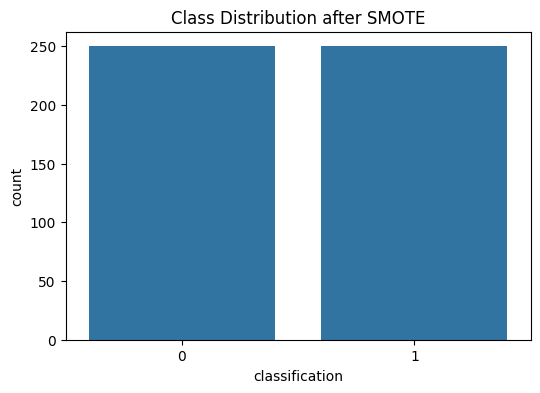

In [185]:
# Balancing the Dataset
X = df.drop('classification', axis=1)
y = df['classification']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution after SMOTE")
plt.show()

In [186]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (400, 11)
Testing Data Shape: (100, 11)


In [170]:
# Model Training & Evaluation
models = {
"Logistic Regression": LogisticRegression(),
"Random Forest Classifier": RandomForestClassifier(),
"Gradient Boosting Classifier": GradientBoostingClassifier(),
"K-Nearest Neighbors": KNeighborsClassifier(),
"Support Vector Machine": SVC(),
"AdaBoost Classifier": AdaBoostClassifier(algorithm="SAMME", random_state=42),
"GaussianNB": GaussianNB(),
"XGBoost Classifier": XGBClassifier()
}


results = {}


for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  results[name] = acc
  print(f"Model: {name}")
  print("Accuracy:", acc)
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print("-"*50)

Model: Logistic Regression
Accuracy: 0.96
Confusion Matrix:
 [[54  0]
 [ 4 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.91      0.95        46

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

--------------------------------------------------
Model: Random Forest Classifier
Accuracy: 1.0
Confusion Matrix:
 [[54  0]
 [ 0 46]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

--------------------------------------------------
Model: Gradient Boosting Classif

In [187]:
# Best Model Selection
best_model_name = max(results, key=results.get)
print("Best Model:", best_model_name, "with Accuracy:", results[best_model_name])

Best Model: Random Forest Classifier with Accuracy: 1.0


In [188]:
# Training final model
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [190]:
# Saving Model
pickle.dump(scaler, open('models/scaler.pkl', 'wb'))
pickle.dump(model_xgb, open('models/xgb_model.pkl', 'wb'))

print("Models saved successfully.")

Models saved successfully.


In [192]:
# Prediction Function
def predict_disease(age, bp, sg, al, hemo, sc, htn, dm, cad, appet, pc):
  input_data = pd.DataFrame({
  'age': [age], 'bp': [bp], 'sg': [sg], 'al': [al], 'hemo': [hemo], 'sc': [sc],
  'htn': [htn], 'dm': [dm], 'cad': [cad], 'appet': [appet], 'pc': [pc]
  })

  # encoding categorical features
  input_data['htn'] = input_data['htn'].map({'yes': 1, 'no': 0})
  input_data['dm'] = input_data['dm'].map({'yes': 1, 'no': 0})
  input_data['cad'] = input_data['cad'].map({'yes': 1, 'no': 0})
  input_data['appet'] = input_data['appet'].map({'good': 1, 'poor': 0})
  input_data['pc'] = input_data['pc'].map({'normal': 1, 'abnormal': 0})

  # scaling numerical features
  input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])

  # prediction
  prediction = model_xgb.predict(input_data)
  return prediction[0]

In [193]:
# Example Prediction ---
result = predict_disease(age=45, bp=120, sg=2.0, al=1, hemo=9, sc=1.2, htn='yes', dm='yes', cad='yes', appet='poor', pc='normal')

if result == 1:
  print("The patient is predicted to have chronic kidney disease.")
else:
  print("The patient is predicted to not have chronic kidney disease.")

The patient is predicted to have chronic kidney disease.
